### 如何理解高斯模糊？
模糊化=光滑化  
一般图像光滑化的方式是对所有的像素点进行卷积操作。**高斯模糊就是让卷积核的值服从高斯分布。**  给卷积核矩阵赋值$conv_mat[x][y]=\frac{1}{2\pi \delta ^2}e^{-(x^2+y^2)/(2\delta^2)}$，注意$\delta$是一个需要设置的常数

原始图片


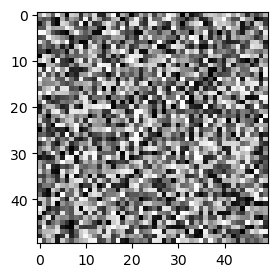

In [91]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
# from matplotlib.font_manager import FontProperties
# # 设置中文字体，这里以常用的 'SimHei' 为例，如果你的系统没有，可以尝试其他字体
# font_path = "C:/Windows/Fonts/SimHei.ttf" # 假设 SimHei 字体在 Windows 系统路径下
# my_font = FontProperties(fname=font_path)

# 创建一个尺寸为 6x6 英寸的图形
plt.figure(figsize=(3, 3))
img = np.random.random((50,50))
print("原始图片")
plt.imshow(img, cmap='gray')
plt.show()
# 如果没有 plt.show()，你的代码会创建一个图形对象并在上面绘制图像，
# 但这些操作都只停留在内存中，你将什么也看不到。脚本会直接执行到最后并退出，
# 而没有任何图形窗口弹出。不过notebook环境会自动显示图像。

卷积核可视化为


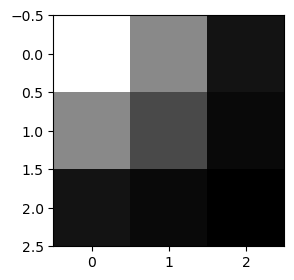

In [92]:
# 二维高斯函数
def guassian(x, y, delta=0.9):
    return np.exp(-(x**2 + y**2) / (2 * delta**2)) / (2 * np.pi * delta**2)

# 创建高斯卷积核
kernel_size = 3
x = np.arange(kernel_size)
y = np.arange(kernel_size)
# 使用广播创建二维坐标网格
xx, yy = np.meshgrid(x, y)
conv_kernel = guassian(xx, yy)
print("卷积核可视化为")
plt.figure(figsize=(3, 3))
plt.imshow(conv_kernel,cmap='gray')
plt.show()

卷积核可视化为


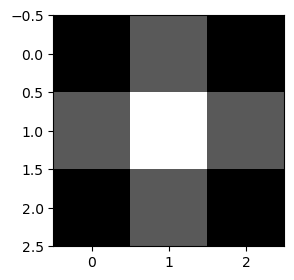

In [93]:
conv_kernel_center = guassian(xx-kernel_size//2, yy-kernel_size//2)
print("卷积核可视化为")
plt.figure(figsize=(3, 3))
plt.imshow(conv_kernel_center,cmap='gray')
plt.show()

卷积后的图片


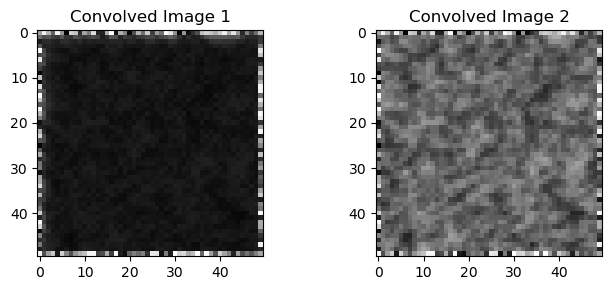

In [94]:

def conv_window(mat, conv_kernel):
    return np.sum(mat * conv_kernel)

# # *标准的滑动窗口卷积操作,后续的计算会不受之前计算结果的影响*
# def conv(mat, conv_kernel):
#     w, h = mat.shape
#     kw, kh = conv_kernel.shape
#     # 计算输出矩阵的尺寸
#     output_h = h - kh + 1
#     output_w = w - kw + 1
#     # 初始化输出矩阵
#     conv_mat = np.zeros((output_w, output_h))
#     # 使用嵌套循环遍历图像中的每一个窗口
#     for x in range(output_w):
#         for y in range(output_h):
#             # 提取图像的窗口
#             mat_slice = mat[x:x+kw, y:y+kh]  
#             # 计算并存储卷积值
#             conv_mat[x, y] = conv_window(mat_slice, conv_kernel)
#     return conv_mat

# *逐像素更新的局部操作,后续的计算会受到之前计算结果的影响*
def conv(img, kernel):
    w, h = img.shape
    kw, kh = conv_kernel.shape
    for row in range(1, w - kw +1+1):
        for col in range(1, h - kh +1+1):
            mat_slice = img[row-1:row+2, col-1:col+2]  
            img[row, col] = conv_window(mat_slice, kernel)
    return img
# 对图片进行卷积操作，并另存为新图片
img_conved = conv(img.copy(), conv_kernel)
img_conved_center = conv(img.copy(), conv_kernel_center)
print("卷积后的图片")
# plt.figure(figsize=(3, 3))
# plt.imshow(img,cmap='gray')
# plt.imshow(img_center,cmap='gray')
# plt.show()

# 使用 subplots() 创建一个 1 行 2 列的图形布局
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
# 在第一个子图中显示第一张图片
axes[0].imshow(img_conved, cmap='gray')
axes[0].set_title('Convolved Image 1')
# 在第二个子图中显示第二张图片
axes[1].imshow(img_conved_center, cmap='gray')
axes[1].set_title('Convolved Image 2')
# 调整子图之间的间距，让布局更美观
plt.tight_layout()
plt.show()

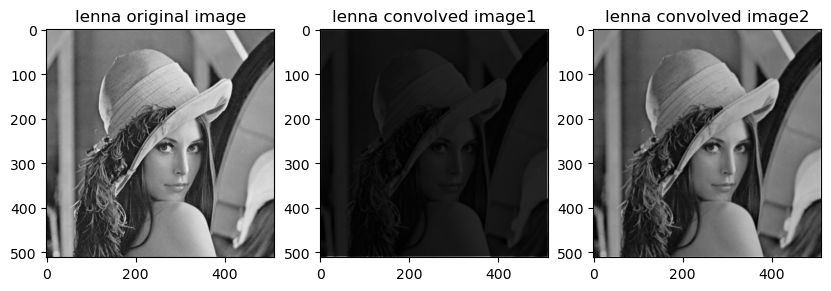

In [96]:
lenna_img_mat = cv2.imread("./lenna.jpg",cv2.IMREAD_GRAYSCALE)
_, axes = plt.subplots(1, 3, figsize=(10, 3))

axes[0].imshow(lenna_img_mat,cmap='gray')
axes[0].set_title('lenna original image')

lenna_img_mat_conved = conv(lenna_img_mat.copy(), conv_kernel)
axes[1].imshow(lenna_img_mat_conved,cmap='gray')
axes[1].set_title('lenna convolved image1')

lenna_img_mat_conved_center = conv(lenna_img_mat.copy(), conv_kernel_center)
axes[2].imshow(lenna_img_mat_conved_center,cmap='gray')
axes[2].set_title('lenna convolved image2')

plt.show()